In [1]:
!pip install -r requirements.txt


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for Werkzeug>=2.3.3 from https://files.pythonhosted.org/packages/ba/d6/8040faecaba2feb84e1647af174b3243c9b90c163c7ea407820839931efe/Werkzeug-2.3.6-py3-none-any.whl.metadata
  Obtaining dependency information for plumbum from https://files.pythonhosted.org/packages/6f/e8/a9a580d1d67825d8bdc16f3993ea58c4066769d5f8ba34caaa69a5344b39/plumbum-1.8.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 15.2 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=9ef0

In [2]:
import numpy as np
import langdetect
import matplotlib.pyplot as plt
import pandas as pd
import re
from utils import *
#Reading Data
df = pd.read_csv('fall_guys_user_reviews.csv', lineterminator='\n')
df.head()

,Name,Rating,Review,Date
0,Vaulie,8,"Great addictive fun, and a timely palette clea...","Aug 15, 2020"
1,TheRealGhost_,10,One of the better games you can use your time ...,"Aug 18, 2020"
2,benster16,8,"Colourful, addictive, and a lot of fun as a li...","Aug 13, 2020"
3,Itrainedyahyard,10,It’s just too fun and it has such great gamepl...,"Aug 14, 2020"
4,MooTheCow,0,SCAM GAME! BUYER BEWARE!\r This WAS a good gam...,"Nov 30, 2021"


In [3]:
# Split data by reviews types
df = df[['Rating', "Review"]]
pos = print(f'Positive rating >= 7:  {len(df.loc[df["Rating"] >= 7])}')
print(f'Negative rating <= 5: {len(df.loc[df["Rating"] <= 5])}')
print(f'5 < Neutral rating < 7:  {len(df.loc[(df["Rating"] > 5) & (df["Rating"] < 7)])}')

Positive rating >= 7:  59
Negative rating <= 5: 36
5 < Neutral rating < 7:  8


In [4]:
#Excluding big reviews (more than 3.000 char)
long_reviews = df.loc[df['Review'].str.len() > 3000].index
df.drop(long_reviews, inplace=True)
print(len(df.loc[df["Rating"] < 100]))

102


('game', 78) ('fun', 33) ('games', 23) ('battle', 16) ('game.', 16) 

("It's", 16) ('like', 15) ('friends', 14) ('Fall', 14) ('play', 14) 

('servers', 13) ('good', 13) ('new', 13) ('Guys', 13) ('going', 12) 

('lot', 11) ('playing', 10) ('great', 9) ('guys', 9) ('pretty', 9) 

('fall', 9) ('add', 8) ('mini', 8) ('party', 8) ('need', 8) 

('long', 8) ('game,', 8) ('pass', 8) ('fixed', 7) ('feel', 7) 



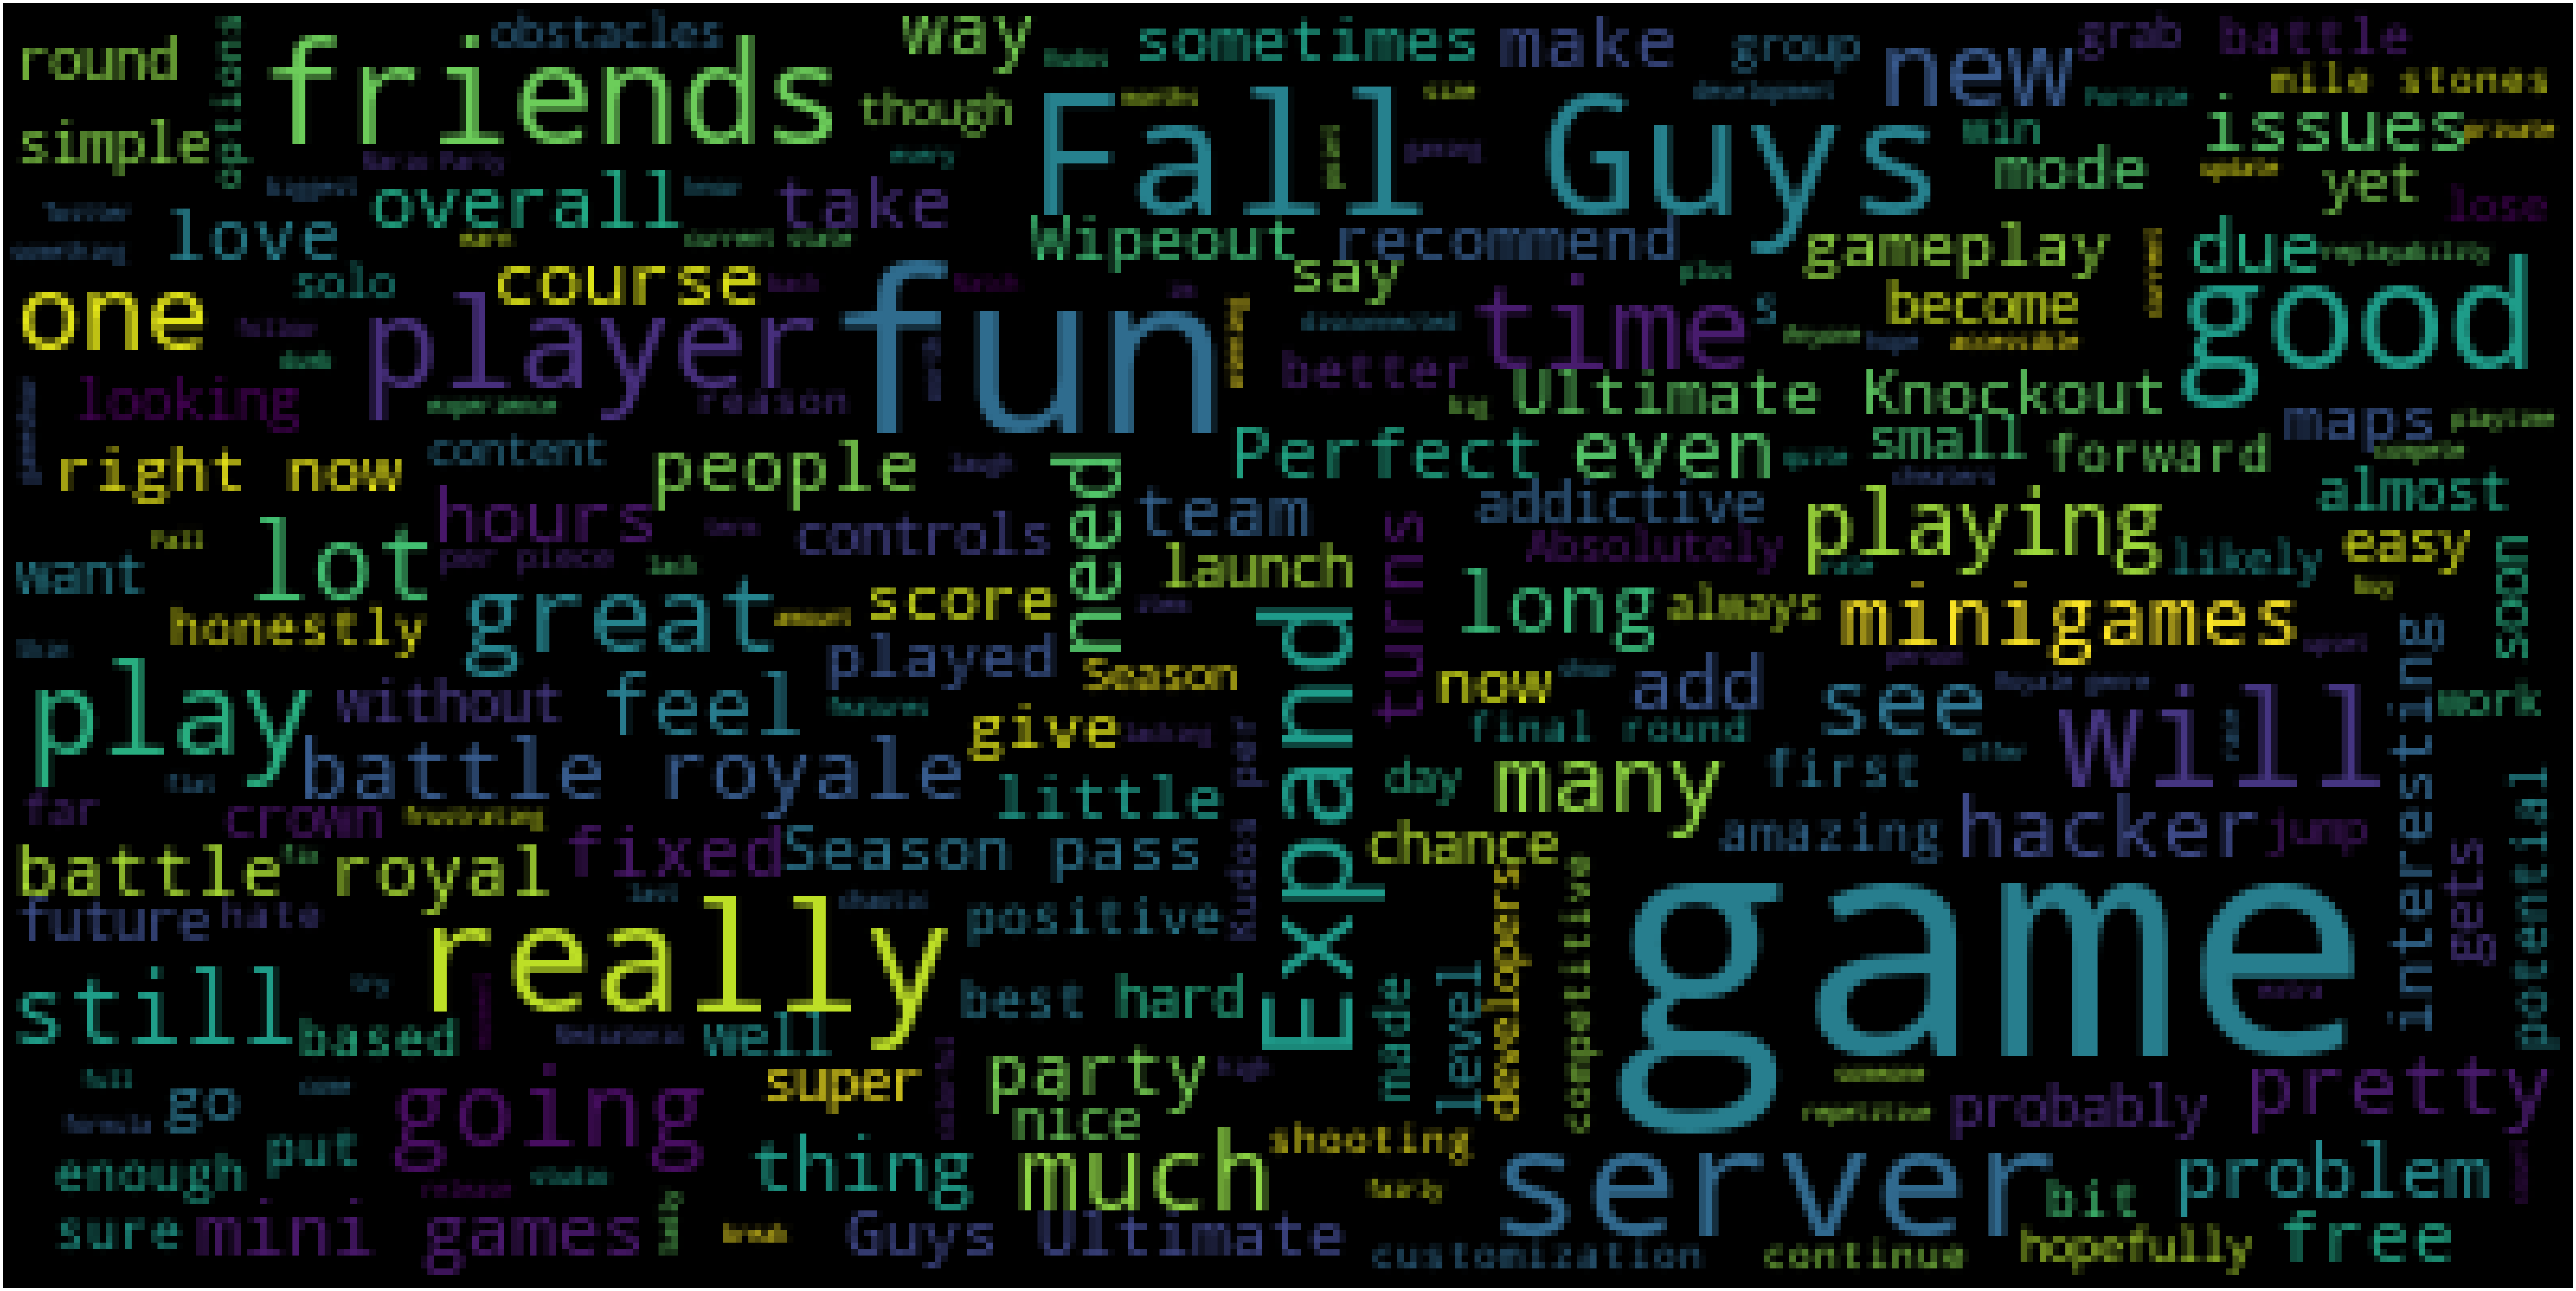

In [5]:
#Analyszing data of positive reviews
positive_reviews=df[df['Rating']>=7]
russian_characters = re.compile(r"[\u0400-\u052F]")
cleaned_reviews = []
#Cleaning data so there is only Enlgish
for review in positive_reviews['Review']:
    try:
        lang = langdetect.detect(review)
    except:
        continue 
    if lang == "en":
      cleaned_reviews.append(review)
from wordcloud import WordCloud, STOPWORDS
words = []
#Splitting reviews strings in tokes(words)
for value in cleaned_reviews:
    for word in re.split(" ", value):
        if word:
            words.append(word)
#Getting a dictionary with all reviews words
repeated_words = word_count(words)
#Opening a file with words that are not important for analysis
entries =  set(open('words.txt').read().split())
#removing all prepositions, pronounms and words that should be analysed
entries_to_remove(entries, repeated_words)
repeated_words = (sorted(repeated_words.items(),reverse=True, key=lambda item: item[1]))
#Priting list with the most repeated words
rows = int(len(repeated_words)/5)
for i in range(6):
    sublist = repeated_words[i*5 : i*5 + 5]
    sublist.append("\n")
    print(*sublist)
#Cloud with positive reviews words
word_cloud(cleaned_reviews,'black','Most Used Words')